<a href="https://colab.research.google.com/github/Holf/playwright-python-bdd-playground/blob/main/Playwright_BDD_Tests_for_Isomorphic_Labs_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## What this is

Tests some journeys on the Isomorphic Labs website, with a focus on the 'Work with us' page.

Uses Visual Snapshots to gain wide (albeit non-functional) coverage with low effort.



## What this is not

This is not meant to represent any kind of canonical approach to writing BDD-style tests in Python or on Colab notebooks.. Rather, it is an exploration of how I can tie patterns and practices that I am very familiar with to a world that is entirely new to me.

My hope is that this will go some way to showing that, despite my relative lack of battle-hardened Python / Colab exposure, I have enough smarts and equivalent experience to rapdily learn to contribute in a role at Isomorphic Labs.



## Solution components

Uses Playwright, Python, Pytest, Pytest-BDD, Page Objects, Visual Snapshot Testing

## Colab limitations



Colab Sections

* What this is
  * Playwright?
* Limitations
  * A description of approaches to using BDD in Colab... not what might be given to an end user
  * Can only run on Chrome
* How this was acheived
* Explanation of PageObjects, classes
* Where next?
  * Ability to mix and match steps in new Scenarios?



# Clone Repo from GitHub

The Python code that runs the Cucumber Tests is stored in a [GitHub repository](https://github.com/Holf/playwright-python-bdd-playground). We need to clone that repo to this notebook's filesystem before we can set up and run any tests.

Additionally, the next section of this notebook goes into further detail about how the code and features are structured.

Rather than having to maintain copies of files in text cells I have, instead, chosen to render the file contents into cells dynamically. This way, the files are updated here automatically each time they are changed in GitHub.

Thus, we have to do that Git Clone operation now, before we go into detail on file contents.

*(I do not know if this is standard, or even good, practice but anything I can do to avoid duplication and maintenance effort seems like a good idea, on the face of it.)*




In [1]:
# Resetting directory location (in case this step is being repeated after other directory changes below)
%cd /content/

# Cloning from GitHub repo
!git clone https://github.com/Holf/playwright-python-bdd-playground.git

# Changing to directory where everything will run from now on
%cd /content/playwright-python-bdd-playground


/content
Cloning into 'playwright-python-bdd-playground'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 201 (delta 82), reused 140 (delta 51), pack-reused 0
Receiving objects: 100% (201/201), 1.84 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (82/82), done.
/content/playwright-python-bdd-playground


# A deeper dive on some project elements



## Packages used

These are the key packages I used for this solution. The choices are down to a mix of: what I already know; what I took to when trying options out; and what the Python community seem to favour:


| Package | Description | Further info |
|---|---|---|
| `pytest` | The de facto standard for testing in Python. | https://docs.pytest.org/<br><br>I chose this because, it seems, everybody else does. |
| `pytest-playwright` | The Python version of the Playwright end-to-end testing framework. | https://playwright.dev/python/docs/api/class-playwright<br><br>Playwright is in the same space as Cypress & WebdriverIO.<br>It is the new kid on the block and has shaken things up a bit, with good reason.<br><br>I have used many test automation frameworks over the years and Playwright has given me the most joy, so far. |
| `pytest-playwright-visual` | Brings Visual Snapshot Testing capabilities to `pytest-playwright`. | https://pypi.org/project/pytest-playwright-visual/<br><br>I like Visual Snapshot Tests. Interactive, behavioural aspects of a system should always be covered using dedicated, functional tests.<br>But, for broad layout and rendering concerns across different platforms, Visual Snapshot Tests give a lot of bang for the buck. |
| `pytest-bdd` | Gives Cucumber-style BDD testing features to `pytest`. | https://pypi.org/project/pytest-bdd/<br><br>There are two or three contenders in this space. This one I took to most easily, although maybe it was just a `pytest-bdd` sort of day. |
| `pytest-bdd-html` | Allows `pytest-bdd` to generate HTML test reports. | https://pypi.org/project/pytest-bdd-html/<br><br>I'm not too keen on the out-of-the-box styling (although I accept that beauty is in the eye of the beholder). |


## Getting Visual Snapshots to run on Colab





In [29]:
from IPython.display import Code, display
display(Code(filename='/content/playwright-python-bdd-playground/tests/colab_utils/setup_non_playwright_chromium_option.py', language="python3"))

from typing import Dict
import pytest

def pytest_addoption(parser):
    parser.addoption(
        "--use-non-playwright-chromium",
        action="store",
        default="false",
        help="Use preinstalled Chromium instead of the the Playwright-bundled version")


def __get_is_non_playwright_chromium_specified(request):
    return request.config.getoption("--use-non-playwright-chromium").lower() == "true"


@pytest.fixture(scope="session")
def browser_type_launch_args(browser_type_launch_args: Dict, request) -> Dict:
    if __get_is_non_playwright_chromium_specified(request):
        return {**browser_type_launch_args, "executable_path": "/usr/bin/chromium-browser"}

    return browser_type_launch_args

## Yo

### Colab limitations


# Demo



## Set up the environment

### Install Python dependencies

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.2 MB/s eta 0:00:00
  Created wheel for parse: filename=parse-1.19.0-py3-none-

### Install Playwright dependencies for Chromium

In [4]:
!python -m playwright install-deps chromium

Installing dependencies...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:14 http://pp

### Install Chromium & Chromedriver

In [5]:
!add-apt-repository -y ppa:saiarcot895/chromium-beta
!apt-get update
!apt-get install chromium-browser

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://ppa.launchpad.net/saiarcot895/chromium-beta/ubuntu focal InRelease [23.8 kB]

## Run tests

### Execute Pytest

In [6]:
!pytest tests --gherkin-terminal-reporter --cucumberjson=tests.json --use-non-playwright-chromium=true -vv --html="Isomorphic Labs Website Tests.html" --self-contained-html

============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.2.0, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
metadata: {'Python': '3.8.10', 'Platform': 'Linux-5.10.147+-x86_64-with-glibc2.29', 'Packages': {'pytest': '7.2.0', 'pluggy': '1.0.0'}, 'Plugins': {'playwright': '0.3.0', 'base-url': '2.0.0', 'bdd-html': '0.1.14a0', 'metadata': '2.0.4', 'html': '3.2.0', 'playwright-visual': '2.1.2', 'xdist': '3.1.0', 'bdd': '6.1.1', 'typeguard': '2.7.1'}, 'Base URL': ''}
rootdir: /content/playwright-python-bdd-playground
plugins: playwright-0.3.0, base-url-2.0.0, bdd-html-0.1.14a0, metadata-2.0.4, html-3.2.0, playwright-visual-2.1.2, xdist-3.1.0, bdd-6.1.1, typeguard-2.7.1
collected 2 items                                                              

tests/test_navigate_to_workWithUs_page.py::test_is_starting <- ../../usr/local/lib/python3.8/dist-packages/pytest_bdd/scenario.py 
Feature: Navigation
    Scenario: user c

### Render HTML test report

In [7]:
from IPython.display import HTML, display
display(HTML(filename='/content/playwright-python-bdd-playground/Isomorphic Labs Website Tests.html'))

### Screenshots
You can go to the project page and in web-interface you can see something like this:
<table  align="center">
  <tr><td>
    <img src="yop.png"
         alt="Project interface"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> What the project interface might look like.
  </td></tr>
</table>

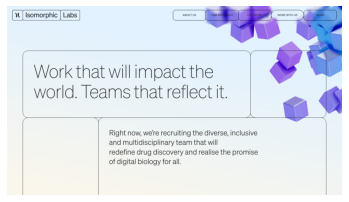

In [28]:
from matplotlib import pyplot as plt
import cv2

img_color = cv2.imread('/content/playwright-python-bdd-playground/tests/snapshots/test_workWithUs_page_layout/test_workWithUs_page_layout/test_workWithUs_page_layout[linux].png', 1)
plt.imshow(img_color)
plt.axis("off")
plt.show()



# What's next?

These are the sorts of things I would explore, were I to take this further under my own steam.

I would, of course, welcome the opportunity to discover and adopt best practice in this space, while adding to the knowledge pool with my own ideas.



* Make Scenario steps reusable by editing Feature files directly in Colab.
* 


In [30]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Isomorphic Labs Website Tests.html
	tests.json

nothing added to commit but untracked files present (use "git add" to track)
